1. Подключаем библиотеки

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

2. Считываем данные

In [3]:
df=pd.read_csv("D:\Анализ данных\data_analysis\Homeworks\Homework3\ORGANICS.csv",encoding="cp1251")

3. Заменяем Nan усредненными значениями (fillna())

In [4]:
df = df.fillna(df.median(axis=0), axis=0)

4. Выбираем количественные столбцы

In [5]:
x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
print(x)
y = df.values[::,11]

       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0    68.0         4.0       0.01       8.0
...        ...     ...         ...        ...       ...
22218     13.0    65.0         9.0    1500.00       5.0
22219     15.0    73.0        34.0    6053.06      12.0
22220      9.0    70.0        15.0    6000.00       5.0
22221     11.0    66.0         8.0    5000.00       5.0
22222      3.0    75.0        53.0    6000.00       2.0

[22223 rows x 5 columns]


5. Обучаем решающее дерево с параметрами criterion = entropy, max_depth = 5

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

5. Определяем точность на контроле

In [7]:
y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.8024598770061497

6. Визуализация разделяющей поверхности 

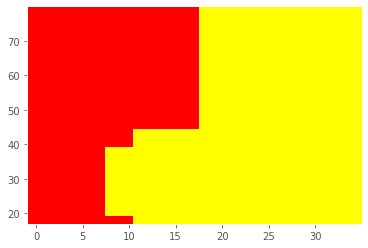

In [26]:
# Вспомогательную функцию, которая возвращает решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

x = df[['DemAffl', 'DemAge']]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)
y_train = y_train.astype(int)
# обучаем дерево
tree.fit(X_train, y_train)

#код для отображения разделяющей поверхности
xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

7. Рассмотрим 4 различных значений глубины дерева и минимального числа объектов в листе

###### max_depth = 6, min_samples_leaf = 2

In [8]:
x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=6, min_samples_leaf = 2, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.8014099295035249


###### max_depth = 6, min_samples_leaf = 1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=6, min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.7910604469776511


###### max_depth = 20, min_samples_leaf = 1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=20, min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.7324133793310335


###### max_depth = 4, min_samples_leaf = 8

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf = 8, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.8020098995050248


### Как влияют на вид разделяющей поверхности и точности модели?

Чем больше глубина дерева решений, тем точность модели становится меньше.
Пример:
 - при max_depth = 6, min_samples_leaf = 1 
 (Точность: 0.7939103044847757 (79%))
 - при max_depth = 20, min_samples_leaf = 1
 (Точность: 0.71966401679916 (71%))

8. Находим все столбцы с категориальными признаками 

In [12]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
print(categorical_columns)

['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']


9. Заменяем категориальные столбцы на бинарное кодирование

In [18]:
def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + "=" + i] = (data[feature] == i).astype(int)
        
le = LabelEncoder()
for c in categorical_columns:
    df[c] = df[c].astype(str)
    le.fit(df[c])
    df[df[c].name +'N'] = le.fit_transform(df[c])
    code_myohe(df, c)
    
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,...,DemTVReg=C Scotland,DemTVReg=Ulster,DemTVReg=S West,DemTVReg=Yorkshire,DemTVReg=Border,DemTVReg=N Scot,PromClass=Gold,PromClass=Silver,PromClass=Tin,PromClass=Platinum
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,...,0,0,0,0,0,0,1,0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,...,0,0,0,0,0,0,1,0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,...,0,0,0,0,0,0,0,1,0,0
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,...,0,0,0,0,0,0,0,0,1,0
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,...,0,0,0,0,0,0,0,1,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,...,0,0,0,0,0,0,1,0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,...,0,0,0,1,0,0,1,0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,...,0,0,0,0,0,0,0,1,0,0


### Удается ли с помощью новых признаков повысить качество классификации?

Используя бинарное кодирование, мы можем правильно описать частоты нашей выборки. Это позволит делать более правильные дальнейшие выводы и предположения